In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PATH = os.path.join(os.getcwd())
train_dir = os.path.join(PATH, 'training')
validation_dir = os.path.join(PATH, 'validation')
print(PATH)

C:\Users\Anonymous\Desktop\Multi class


In [9]:
train_buildings_dir = os.path.join(train_dir, 'buildings')
train_forest_dir = os.path.join(train_dir, 'forest') 
train_glacier_dir = os.path.join(train_dir, 'glacier') 
train_mountain_dir = os.path.join(train_dir, 'mountain') 
train_sea_dir = os.path.join(train_dir, 'sea') 
train_street_dir = os.path.join(train_dir, 'street')  

validation_buildings_dir = os.path.join(validation_dir, 'buildings')
validation_forest_dir = os.path.join(validation_dir, 'forest') 
validation_glacier_dir = os.path.join(validation_dir, 'glacier') 
validation_mountain_dir = os.path.join(validation_dir, 'mountain') 
validation_sea_dir = os.path.join(validation_dir, 'sea') 
validation_street_dir = os.path.join(validation_dir, 'street')

In [18]:
print(len(os.listdir(train_buildings_dir)))
print(len(os.listdir(validation_forest_dir)))

2191
474


In [19]:
num_buildings_tr = len(os.listdir(train_buildings_dir))
num_forest_tr = len(os.listdir(train_forest_dir))
num_glacier_tr = len(os.listdir(train_glacier_dir))
num_mountain_tr = len(os.listdir(train_mountain_dir))
num_sea_tr = len(os.listdir(train_sea_dir))
num_street_tr = len(os.listdir(train_street_dir))

num_buildings_val = len(os.listdir(validation_buildings_dir))
num_forest_val = len(os.listdir(validation_forest_dir))
num_glacier_val = len(os.listdir(validation_glacier_dir))
num_mountain_val = len(os.listdir(validation_mountain_dir))
num_sea_val = len(os.listdir(validation_sea_dir))
num_street_val = len(os.listdir(validation_street_dir))

total_train = num_buildings_tr + num_forest_tr + num_glacier_tr + num_mountain_tr + num_sea_tr + num_street_tr
total_val = num_buildings_val + num_forest_val + num_glacier_val + num_glacier_val + num_sea_val + num_street_val

In [20]:
print("Total training building images:", num_buildings_tr)
print("Total training forest images:", num_forest_tr)
print("Total training glacier images:", num_glacier_tr)
print("Total training mountain images:", num_mountain_tr)
print("Total training sea images:", num_sea_tr)
print("Total training building images:", num_street_tr)

print("Total validation building images:", num_buildings_val)
print("Total validation forest images:", num_forest_val)
print("Total validation glacier images:", num_glacier_val)
print("Total validation mountain images:", num_mountain_val)
print("Total validation sea images:", num_sea_val)
print("Total validation building images:", num_street_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training building images: 2191
Total training forest images: 2271
Total training glacier images: 2404
Total training mountain images: 2512
Total training sea images: 2274
Total training building images: 2382
Total validation building images: 437
Total validation forest images: 474
Total validation glacier images: 553
Total validation mountain images: 525
Total validation sea images: 510
Total validation building images: 501
Total training images: 14034
Total validation images: 3028


In [36]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [22]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [23]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [30]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

In [33]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

In [39]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 109 steps, validate for 23 steps
Epoch 1/5
109/109 [==============================] - 161s 1s/step - loss: 0.6666 - accuracy: 0.7512 - val_loss: 0.6374 - val_accuracy: 0.7765
Epoch 2/5
109/109 [==============================] - 143s 1s/step - loss: 0.5483 - accuracy: 0.8022 - val_loss: 0.5645 - val_accuracy: 0.7979
Epoch 3/5
109/109 [==============================] - 143s 1s/step - loss: 0.4352 - accuracy: 0.8450 - val_loss: 0.5508 - val_accuracy: 0.8074
Epoch 4/5
109/109 [==============================] - 143s 1s/step - loss: 0.3292 - accuracy: 0.8855 - val_loss: 0.5242 - val_accuracy: 0.8237
Epoch 5/5
109/109 [==============================] - 145s 1s/step - loss: 0.2651 - accuracy: 0.9079 - val_loss: 0.6222 - val_accuracy: 0.7955


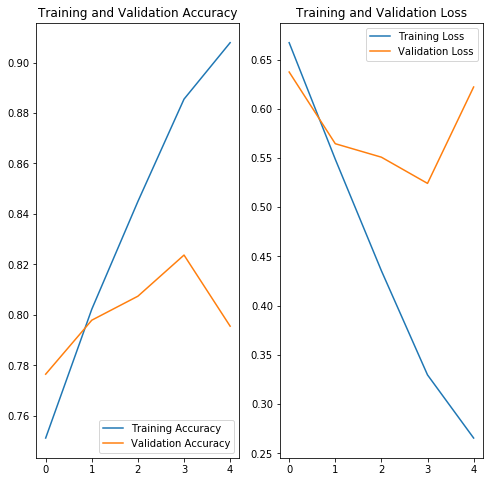

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
import numpy as np

predict_dir_path='testing/'
test_files = [f for f in os.listdir(predict_dir_path) if os.path.isfile(os.path.join(predict_dir_path, f))]
print(test_files)

IMG_WIDTH=150
IMG_HEIGHT=150

['101.jpg', '103.jpg', '110.jpg', '117.jpg', '119.jpg', '121.jpg', '126.jpg', '127.jpg', '129.jpg', '130.jpg', '132.jpg', '133.jpg', '135.jpg', '140.jpg', '141.jpg', '143.jpg', '144.jpg', '145.jpg', '149.jpg', '152.jpg', '156.jpg', '161.jpg', '169.jpg', '93.jpg', '99.jpg']


In [50]:
from keras.preprocessing import image

for file in test_files:
    img = image.load_img(predict_dir_path+file, target_size=(IMG_WIDTH, IMG_HEIGHT))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)

99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[1. 0. 0. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 0. 0. 0. 1.]]
99.jpg
[[1. 0. 0. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[9.9966502e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3494114e-04
  0.0000000e+00]]
99.jpg
[[0. 0. 0. 0. 0. 1.]]
99.jpg
[[0. 0. 0. 0. 1. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 0. 0. 0. 1.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[1. 0. 0. 0. 0. 0.]]
99.jpg
[[1. 0. 0. 0. 0. 0.]]
99.jpg
[[0. 1. 0. 0. 0. 0.]]
99.jpg
[[0. 1. 0. 0. 0. 0.]]
99.jpg
[[1. 0. 0. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
99.jpg
[[0. 0. 1. 0. 0. 0.]]
